# Breast Cancer KNN

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [2]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df = pd.concat([df, pd.DataFrame(data=dataset['target'], columns=['target'])], axis=1)

In [4]:
df = df[['worst concave points', 'worst symmetry', 'target']]

In [5]:
model_knn = KNeighborsClassifier()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                                    df['target'], test_size=0.33, 
                                                    random_state=42)

In [8]:
k_model = KNeighborsClassifier()
k_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

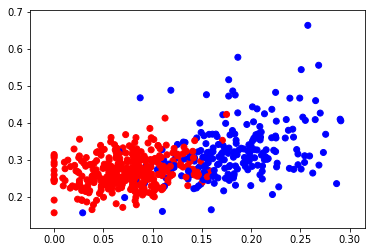

In [9]:
import matplotlib.pyplot as plt
import numpy as np
colors = ['blue', 'red']
plt.scatter(x=df['worst concave points'], 
            y=df['worst symmetry'], 
            cmap=plt.get_cmap('jet'), 
            c=np.array(colors)[df['target']])

In [10]:
pd.DataFrame(cross_validate(k_model, X_train, 
                            y_train, 
                            return_train_score=True, cv=10,
                            scoring='accuracy'))

,fit_time,score_time,test_score,train_score
0,0.003167,0.006677,0.923077,0.938596
1,0.005151,0.000000,0.923077,0.938596
2,0.006005,0.001000,0.871795,0.941520
3,0.008231,0.000000,1.000000,0.926901
4,0.008296,0.005604,0.897436,0.941520
5,0.000000,0.007299,0.973684,0.932945
6,0.003050,0.002033,0.891892,0.938953
7,0.008316,0.004551,0.891892,0.944767
8,0.000000,0.004114,0.918919,0.941860
9,0.005008,0.005257,0.891892,0.936047


In [11]:
pd.DataFrame(cross_validate(KNeighborsClassifier(n_neighbors=300), 
                            X_train, y_train, 
                            return_train_score=True, cv=10))

,fit_time,score_time,test_score,train_score
0,0.002745,0.011492,0.615385,0.619883
1,0.014619,0.000988,0.615385,0.619883
2,0.000000,0.016702,0.615385,0.619883
3,0.000000,0.014908,0.615385,0.619883
4,0.000000,0.000000,0.615385,0.619883
5,0.000000,0.015651,0.631579,0.618076
6,0.000000,0.016584,0.621622,0.619186
7,0.015493,0.000997,0.621622,0.619186
8,0.014631,0.002034,0.621622,0.619186
9,0.010289,0.000000,0.621622,0.619186


In [12]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid = GridSearchCV(KNeighborsClassifier(), 
                   param_grid = {'n_neighbors': np.arange(1, 300)}, cv=5, return_train_score=True)
# n_neighbors is a key classifier and by default is 5

In [55]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,...
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 2

In [56]:
grid.best_params_


{'n_neighbors': 3}

In [57]:
grid.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [58]:
score=pd.DataFrame(grid.cv_results_)

In [59]:
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004224,0.003808,0.004917,0.004938,1,{'n_neighbors': 1},0.922078,0.894737,0.855263,0.881579,...,0.892388,0.022923,159,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003117,0.006234,0.003152,0.006304,2,{'n_neighbors': 2},0.870130,0.842105,0.815789,0.842105,...,0.855643,0.031257,191,0.940789,0.944262,0.940984,0.927869,0.947541,0.940289,0.006684
2,0.003327,0.006169,0.006485,0.007570,3,{'n_neighbors': 3},0.935065,0.934211,0.907895,0.921053,...,0.923885,0.010037,1,0.937500,0.940984,0.944262,0.931148,0.940984,0.938975,0.004460
3,0.003534,0.007067,0.006652,0.008147,4,{'n_neighbors': 4},0.935065,0.921053,0.868421,0.934211,...,0.918635,0.025602,17,0.937500,0.940984,0.931148,0.937705,0.944262,0.938320,0.004357
4,0.001034,0.000936,0.007811,0.007028,5,{'n_neighbors': 5},0.922078,0.934211,0.947368,0.907895,...,0.923885,0.015295,1,0.937500,0.931148,0.931148,0.940984,0.940984,0.936352,0.004436
5,0.000200,0.000399,0.009037,0.007583,6,{'n_neighbors': 6},0.922078,0.921053,0.921053,0.907895,...,0.918635,0.005376,17,0.940789,0.940984,0.931148,0.944262,0.944262,0.940289,0.004814
6,0.002928,0.005856,0.006667,0.007757,7,{'n_neighbors': 7},0.935065,0.921053,0.934211,0.907895,...,0.921260,0.011968,5,0.927632,0.937705,0.927869,0.934426,0.934426,0.932412,0.003991
7,0.001013,0.001280,0.006849,0.008395,8,{'n_neighbors': 8},0.922078,0.921053,0.907895,0.907895,...,0.908136,0.014604,120,0.930921,0.937705,0.924590,0.934426,0.934426,0.932414,0.004462
8,0.002419,0.003316,0.006924,0.006685,9,{'n_neighbors': 9},0.935065,0.921053,0.934211,0.907895,...,0.921260,0.011968,5,0.927632,0.927869,0.924590,0.937705,0.931148,0.929789,0.004469
9,0.006073,0.007444,0.006408,0.007102,10,{'n_neighbors': 10},0.909091,0.921053,0.934211,0.907895,...,0.916010,0.010349,40,0.927632,0.924590,0.931148,0.927869,0.927869,0.927821,0.002076


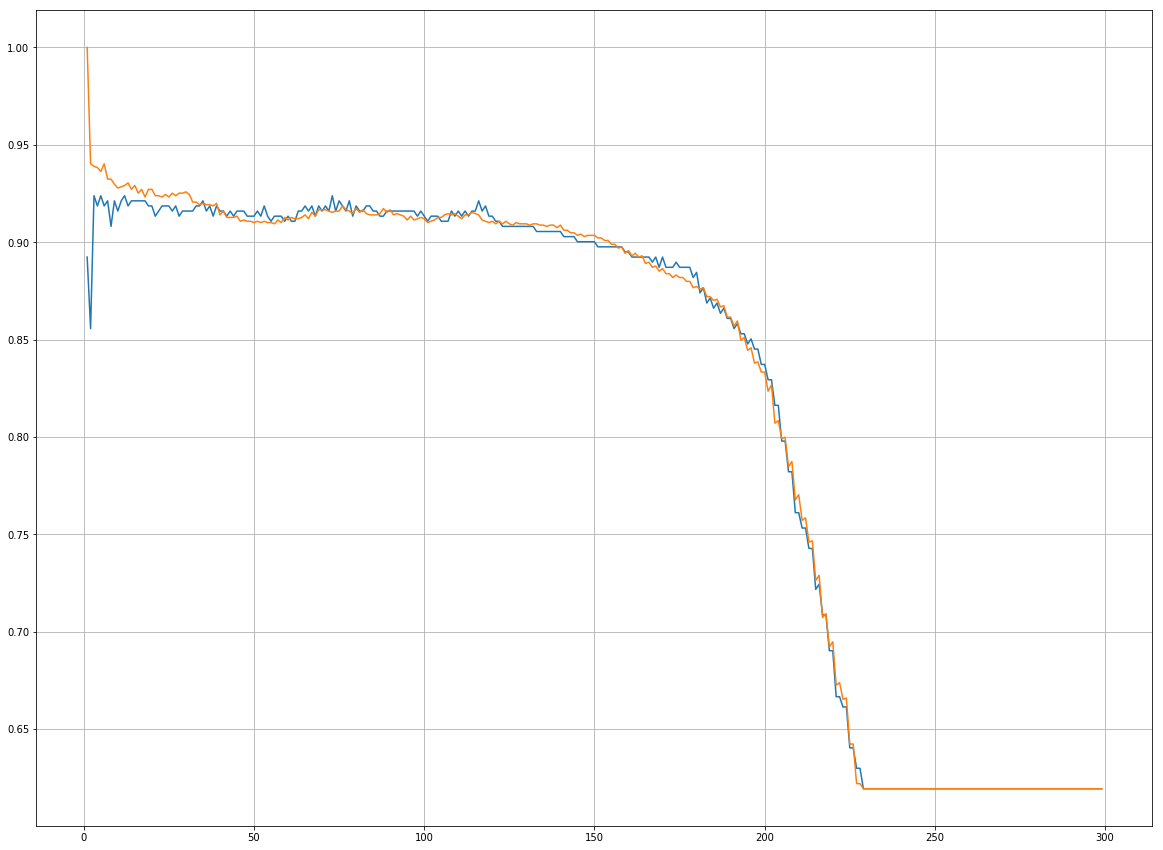

In [67]:
plt.figure(figsize=(20,15))
plt.plot(score['param_n_neighbors'],score['mean_test_score'])
plt.plot(score['param_n_neighbors'],score['mean_train_score'])
plt.grid()

In [68]:
# is the dataset balanced? It counts the number of bananas and apples (in our example)
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

##### Note that both curves goes down after ~ 200 k and they flat down to a values of ~ 0.62 
##### which is exactly 357/(357+212), where 357 and 212 are, in our example, the elements of the 2 classes 
##### (e.g: bananas and apple)